# Program Start

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## CitiBike Data

In [ ]:
#Merging CitiBike data from January and July
df = pd.concat(map(pd.read_csv, ['2014-01 - Citi Bike trip data.csv', '2014-07 - Citi Bike trip data.csv']), ignore_index=True)

In [ ]:
df.head()

,tripduration,starttime,date,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,471,1/1/14 0:00,1/1/14,2009,Catherine St & Monroe St,40.711174,-73.996826,263,Elizabeth St & Hester St,40.717290,-73.996375,16379,Subscriber,1986,1
1,1494,1/1/14 0:00,1/1/14,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,15611,Subscriber,1963,1
2,464,1/1/14 0:03,1/1/14,228,E 48 St & 3 Ave,40.754601,-73.971879,2022,E 59 St & Sutton Pl,40.758491,-73.959206,16613,Subscriber,1991,1
3,373,1/1/14 0:05,1/1/14,519,Pershing Square N,40.751884,-73.977702,526,E 33 St & 5 Ave,40.747659,-73.984907,15938,Subscriber,1989,1
4,660,1/1/14 0:05,1/1/14,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,436,Hancock St & Bedford Ave,40.682166,-73.953990,19830,Subscriber,1990,1


In [ ]:
#viewing datatypes
df.dtypes

tripduration                 int64
starttime                   object
date                        object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                  object
gender                       int64
dtype: object

In [ ]:
#changing types
df['date'] = pd.to_datetime(df['date'])
df["birth year"] = pd.to_numeric(df["birth year"], errors='coerce')

In [ ]:
df.dtypes

tripduration                        int64
starttime                          object
date                       datetime64[ns]
start station id                    int64
start station name                 object
start station latitude            float64
start station longitude           float64
end station id                      int64
end station name                   object
end station latitude              float64
end station longitude             float64
bikeid                              int64
usertype                           object
birth year                        float64
gender                              int64
dtype: object

In [ ]:
#checking for null values
df.isnull().sum()

tripduration                    0
starttime                       0
date                            0
start station id                0
start station name              0
start station latitude          0
start station longitude         0
end station id                  0
end station name                0
end station latitude            0
end station longitude           0
bikeid                          0
usertype                        0
birth year                 126379
gender                          0
dtype: int64

In [ ]:
#filling birth year NaN values with mean birth year
df['birth year'].fillna(df['birth year'].mean(), inplace = True)

In [ ]:
#checking to Nan values
df.isnull().any()

tripduration               False
starttime                  False
date                       False
start station id           False
start station name         False
start station latitude     False
start station longitude    False
end station id             False
end station name           False
end station latitude       False
end station longitude      False
bikeid                     False
usertype                   False
birth year                 False
gender                     False
dtype: bool

In [ ]:
#dropping columns with uncesseasry information
df.drop(['bikeid', 'starttime', 'start station id', 'start station name','start station longitude', 'end station id','start station latitude', 'end station name', 'end station latitude', 'end station longitude'], axis= 1, inplace=True)

In [ ]:
#adding columns for trip duration in minutes and user's age
df['tripduration_minutes'] =  df['tripduration'] / 60
df['age'] =  2014 - df['birth year']

In [ ]:
#final product
df.head()

,tripduration,date,usertype,birth year,gender,tripduration_minutes,age
0,471,2014-01-01,Subscriber,1986.0,1,7.850000,28.0
1,1494,2014-01-01,Subscriber,1963.0,1,24.900000,51.0
2,464,2014-01-01,Subscriber,1991.0,1,7.733333,23.0
3,373,2014-01-01,Subscriber,1989.0,1,6.216667,25.0
4,660,2014-01-01,Subscriber,1990.0,1,11.000000,24.0


## Weather Data

In [ ]:
#importing data, naming df weather
weather = pd.read_csv('weather 01 and 07 .csv')

In [ ]:
#viewing columns
weather.columns

Index(['STATION', 'NAME', 'DATE', 'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD',
       'TAVG', 'TMAX', 'TMIN', 'TSUN', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT01',
       'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08'],
      dtype='object')

In [ ]:
#dropping columns with insuffiecent or uncesseasry information
weather.drop(['STATION', 'NAME','WT02', 'WT03', 'WT04', 'WT05','WT06','WT08', 'TSUN', 'PGTM', 'WDF2', 'WDF5', 'WSF2', 'WSF5' ], axis=1, inplace=True)

In [ ]:
weather.head()

,DATE,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WT01
0,1/1/14,5.59,0.00,0.0,0.0,NaN,33,24,NaN
1,1/2/14,12.30,0.33,3.1,0.0,NaN,33,18,NaN
2,1/3/14,10.51,0.29,3.3,5.9,NaN,18,9,1.0
3,1/4/14,4.92,0.00,0.0,5.9,NaN,29,8,NaN
4,1/5/14,3.80,0.14,0.0,3.9,NaN,40,27,NaN


In [ ]:
#Calculating Average Temperature
weather['TAVG'] = (weather['TMAX'] + weather['TMIN']) / 2

In [ ]:
#renaming columns for simpler reading
weather.rename(columns={'DATE': 'date','AWND':'AVG WIND SPEED','SNWD': 'SNOW DEPTH','WT01': 'FOG'}, inplace = True) 

In [ ]:
weather.head(2)

,date,AVG WIND SPEED,PRCP,SNOW,SNOW DEPTH,TAVG,TMAX,TMIN,FOG
0,1/1/14,5.59,0.00,0.0,0.0,28.5,33,24,NaN
1,1/2/14,12.30,0.33,3.1,0.0,25.5,33,18,NaN


In [ ]:
#checking for NaN values
weather.isnull().sum()

date               0
AVG WIND SPEED     1
PRCP               0
SNOW               0
SNOW DEPTH         0
TAVG               0
TMAX               0
TMIN               0
FOG               52
dtype: int64

In [ ]:
#Filling NaN values with zeros to indicate there was no fog on those particular days
weather['FOG'] = weather['FOG'].fillna(0)

In [ ]:
#Filling NaN with average wind speed
weather['AVG WIND SPEED'].fillna(weather['AVG WIND SPEED'].mean(), inplace = True)

In [ ]:
#checking for NaN values
weather.isnull().sum()

date              0
AVG WIND SPEED    0
PRCP              0
SNOW              0
SNOW DEPTH        0
TAVG              0
TMAX              0
TMIN              0
FOG               0
dtype: int64

In [ ]:
#viewing datatypes of columns
weather.dtypes

date               object
AVG WIND SPEED    float64
PRCP              float64
SNOW              float64
SNOW DEPTH        float64
TAVG              float64
TMAX                int64
TMIN                int64
FOG               float64
dtype: object

In [ ]:
#changing Data-Column type into datetime
weather['date'] = pd.to_datetime(weather['date'])

In [ ]:
#viewing datatypes of columns again to see if type changed
weather.dtypes

date              datetime64[ns]
AVG WIND SPEED           float64
PRCP                     float64
SNOW                     float64
SNOW DEPTH               float64
TAVG                     float64
TMAX                       int64
TMIN                       int64
FOG                      float64
dtype: object

In [ ]:
#final product
weather.head()

,date,AVG WIND SPEED,PRCP,SNOW,SNOW DEPTH,TAVG,TMAX,TMIN,FOG
0,2014-01-01,5.59,0.00,0.0,0.0,28.5,33,24,0.0
1,2014-01-02,12.30,0.33,3.1,0.0,25.5,33,18,0.0
2,2014-01-03,10.51,0.29,3.3,5.9,13.5,18,9,1.0
3,2014-01-04,4.92,0.00,0.0,5.9,18.5,29,8,0.0
4,2014-01-05,3.80,0.14,0.0,3.9,33.5,40,27,0.0


## Merging Data

In [ ]:
#merging data
mdf = df.merge(weather, on='date')

In [ ]:
#check length of dataframe
len(mdf)

1269242

In [ ]:
#ckeck for null values
mdf.isnull().sum()

tripduration            0
date                    0
usertype                0
birth year              0
gender                  0
tripduration_minutes    0
age                     0
AVG WIND SPEED          0
PRCP                    0
SNOW                    0
SNOW DEPTH              0
TAVG                    0
TMAX                    0
TMIN                    0
FOG                     0
dtype: int64

In [ ]:
#adding a column to indicate day of the week based on date
mdf['day'] = pd.to_datetime(mdf['date']).dt.day_name()
mdf.head()

,tripduration,date,usertype,birth year,gender,tripduration_minutes,age,AVG WIND SPEED,PRCP,SNOW,SNOW DEPTH,TAVG,TMAX,TMIN,FOG,day
0,471,2014-01-01,Subscriber,1986.0,1,7.850000,28.0,5.59,0.0,0.0,0.0,28.5,33,24,0.0,Wednesday
1,1494,2014-01-01,Subscriber,1963.0,1,24.900000,51.0,5.59,0.0,0.0,0.0,28.5,33,24,0.0,Wednesday
2,464,2014-01-01,Subscriber,1991.0,1,7.733333,23.0,5.59,0.0,0.0,0.0,28.5,33,24,0.0,Wednesday
3,373,2014-01-01,Subscriber,1989.0,1,6.216667,25.0,5.59,0.0,0.0,0.0,28.5,33,24,0.0,Wednesday
4,660,2014-01-01,Subscriber,1990.0,1,11.000000,24.0,5.59,0.0,0.0,0.0,28.5,33,24,0.0,Wednesday


## Data Aggregates and/or Analysis

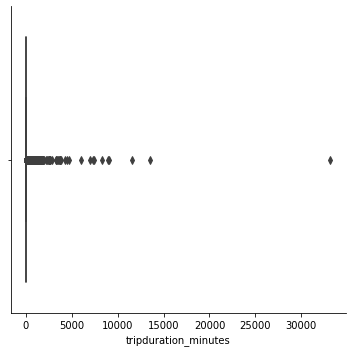

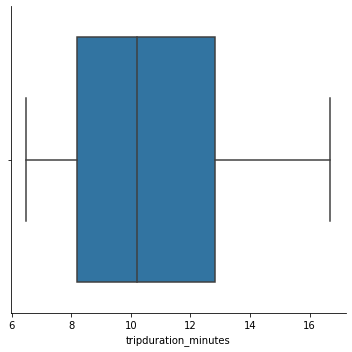

In [ ]:
## Checking for and eliminating outliers (trip duration in minutes)

#Checking for outliers
sns.catplot(x= 'tripduration_minutes', kind = 'box' , data = mdf)

#setting upper and lower limit
upper_limit = mdf['tripduration_minutes'].quantile(0.75)
lower_limit = mdf['tripduration_minutes'].quantile(0.25)

#creating new_df, filtered by values enclosed by upper and lower bounds
new_df = pd.DataFrame(mdf[(mdf['tripduration_minutes'] <= upper_limit) & (mdf['tripduration_minutes'] >= lower_limit)])

sns.catplot(x= 'tripduration_minutes', kind = 'box' , data = new_df)

#### Gender Breakdown

In [ ]:
#Groupby Gender
new_df.groupby('gender')['gender'].count()

gender
0     39440
1    459366
2    136560
Name: gender, dtype: int64

In [ ]:
#CitiBike users Gender Breakdown (Male)
print('Percentage of Male users:',(len(new_df[new_df['gender'] == 1]) / len(new_df['gender'])) * 100)

#CitiBike users Gender Breakdown (Female)
print('Percentage of Female users:',(len(new_df[new_df['gender'] == 2]) / len(new_df['gender'])) * 100)

#CitiBike users Gender Breakdown (Not-Specified)
print('Percentage of non-gendered users:',(len(new_df[new_df['gender'] == 0]) / len(new_df['gender'])) * 100)

Percentage of Male users: 72.29943056443058
Percentage of Female users: 21.493123648416816
Percentage of non-gendered users: 6.207445787152602


In [ ]:
#Average trip duration by gender
new_df.groupby('gender')['tripduration_minutes'].mean()

gender
0    11.856604
1    10.463337
2    10.863585
Name: tripduration_minutes, dtype: float64

#### Usertype Breakdown

In [ ]:
new_df.groupby('usertype')['usertype'].count()

usertype
Customer       39375
Subscriber    595991
Name: usertype, dtype: int64

In [ ]:
#usertype percentage (customers)
print('Percentage of customers:', (len(new_df[new_df['usertype'] ==  "Customer"]) / len(new_df['usertype'])) * 100)

#usertype percentage (subscibers)
print('Percentage of subscibers:',(len(new_df[new_df['usertype'] ==  "Subscriber"]) / len(new_df['usertype'])) * 100)

Percentage of customers: 6.197215463213329
Percentage of subscibers: 93.80278453678667


In [ ]:
#Average trip duration by gender
new_df.groupby('usertype')['tripduration_minutes'].mean()

usertype
Customer      11.859810
Subscriber    10.554987
Name: tripduration_minutes, dtype: float64

In [ ]:
#Grouped by gender and usertype to look at number of users and their average trip duration
new_df.groupby(['gender', 'usertype']).agg({'tripduration_minutes': ['count', 'mean']})

tripduration_minutes           
                                 count       mean
gender usertype                                  
0      Customer                  39363  11.859597
       Subscriber                   77  10.326190
1      Customer                     10  12.646667
       Subscriber               459356  10.463290
2      Customer                      2  12.108333
       Subscriber               136558  10.863567

In [ ]:
#Grouped by gender and usertype to look at number of users and their average trip duration
new_df.groupby(['day', 'usertype']).agg({'tripduration_minutes': ['count', 'mean']})


tripduration_minutes           
                                    count       mean
day       usertype                                  
Friday    Customer                   4977  11.869513
          Subscriber                82613  10.561256
Monday    Customer                   4149  11.792697
          Subscriber                89873  10.494916
Saturday  Customer                   8048  12.014567
          Subscriber                50881  10.650082
Sunday    Customer                   7403  11.935486
          Subscriber                52778  10.636059
Thursday  Customer                   5238  11.788921
          Subscriber               116130  10.557176
Tuesday   Customer                   4446  11.736565
          Subscriber                96301  10.549271
Wednesday Customer                   5114  11.731479
          Subscriber               107415  10.518303

#### Age Breakdown

In [ ]:
#Trip Duration Stats
new_df['age'].describe()

count    635366.000000
mean         38.127433
std          10.849117
min          16.000000
25%          30.000000
50%          37.000000
75%          45.000000
max         115.000000
Name: age, dtype: float64

In [ ]:
#Mean age of CitiBikers
new_df['age'].mean()

38.127433453029596

In [ ]:
#group by age and agg by average tripduration while getting counts of age
new_df.groupby('age').agg({'tripduration_minutes': ['mean','count']})

tripduration_minutes      
                      mean count
age                             
16.0             10.547653   213
17.0             10.607242   748
18.0             10.556805   965
19.0             10.360391  1543
20.0             10.628817  2314
...                    ...   ...
104.0             7.316667     1
107.0             8.783333     2
113.0            10.232917    40
114.0            11.500505    99
115.0            12.325490    17

[80 rows x 2 columns]

# Determine whether there is a correlation between weather and Citi Bike usage

In [ ]:
#Trip Duration and count of riders grouped by snow depth
new_df.groupby('SNOW DEPTH').agg({'tripduration_minutes': ['count', 'mean']})

tripduration_minutes           
                          count       mean
SNOW DEPTH                                
0.0                      582736  10.672355
1.0                        6469  10.243160
1.2                       17937  10.207457
2.0                        5351  10.156419
3.1                        6993  10.260637
3.9                        6350  10.132373
5.9                        5286  10.327560
7.1                        2872  10.321269
11.0                       1372  10.541521

In [ ]:
#Trip Duration and count of riders grouped by inches of rainfall
new_df.groupby('PRCP').agg({'tripduration_minutes': ['count', 'mean']})

tripduration_minutes           
                    count       mean
PRCP                                
0.00               418447  10.658387
0.02                13422  10.873059
0.03                11457  10.851229
0.04                23663  10.533160
0.05                 5962  10.428726
0.07                 4708  10.371194
0.09                17995  10.690323
0.11                 5369  10.287673
0.14                 7457  10.633724
0.19                34784  10.652433
0.29                  628  10.851752
0.33                 4462  10.241121
0.36                 4982  10.156497
0.38                 5318  10.218231
0.39                16946  10.709502
0.46                15590  10.490232
0.50                 4043  10.284896
0.96                13770  10.523707
1.30                12242  10.573576
1.78                14121  10.716510

In [ ]:
#Trip Duration and count of riders grouped by whether or not there is fog
new_df.groupby('FOG').agg({'tripduration_minutes': ['count', 'mean']})

tripduration_minutes           
                   count       mean
FOG                                
0.0               532396  10.632740
1.0               102970  10.651927

In [ ]:
#Which average temperatures generate the most amount of riders?
temp = new_df.groupby('TAVG')['TAVG'].count()
temp.nlargest(5)  

TAVG
75.0    75203
78.0    52367
74.0    38115
78.5    36486
81.0    32972
Name: TAVG, dtype: int64

In [ ]:
#Which average temperatures generate the least amount of riders?
temp = new_df.groupby('TAVG')['TAVG'].count()
temp.nsmallest(5)  

TAVG
11.0    1372
21.0    2051
23.5    2286
28.5    2859
11.5    3199
Name: TAVG, dtype: int64

# Viauslizations

Text(0.5, 6.79999999999999, 'Gender')

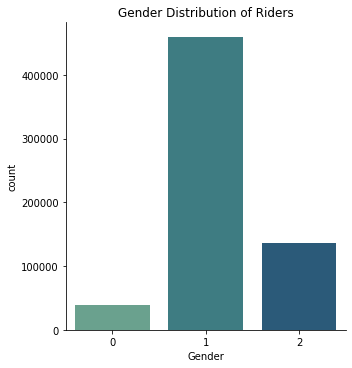

In [ ]:
#Dustribution of Customers based on gender
sns.catplot(x = 'gender', kind = 'count', data = new_df, palette="crest")

plt.title("Gender Distribution of Riders")
plt.xlabel("Gender")

Text(0.5, 6.79999999999999, 'User Type')

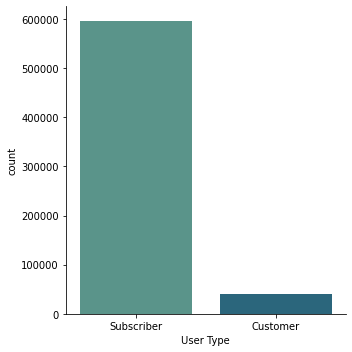

In [ ]:
#Dustribution of Customers based on usertype
sns.catplot(x = 'usertype', kind = 'count', data = new_df, palette="crest")

plt.xlabel("User Type")

Text(0.5, 6.79999999999999, 'User Type')

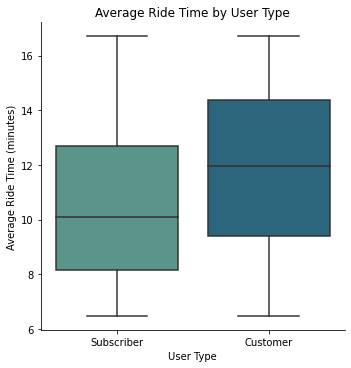

In [ ]:
#Dustribution of Customers based on usertype
sns.catplot(x = 'usertype', y = 'tripduration_minutes', kind = 'box', data = new_df, palette="crest")

plt.title("Average Ride Time by User Type")
plt.ylabel("Average Ride Time (minutes)")
plt.xlabel("User Type")

Text(0.5, 0, 'Day of the Week')

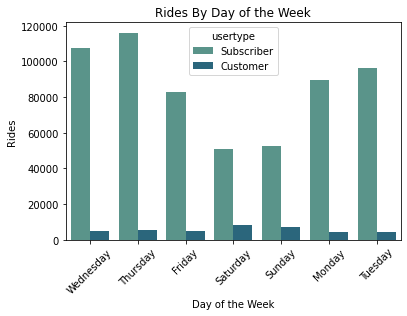

In [ ]:
#Rides By Day of the Week, hue = user type
sns.countplot(x="day", data=new_df, hue = 'usertype', palette="crest")
plt.xticks(rotation=45)

plt.title("Rides By Day of the Week")
plt.ylabel("Rides")
plt.xlabel("Day of the Week")

Text(0.5, 0, 'Day of the Week')

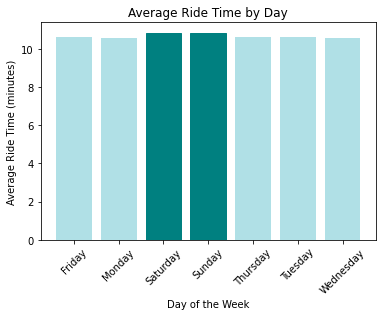

In [ ]:
#Average Ride Time by Day of the Week
days = new_df.groupby('day')['tripduration_minutes'].mean()

x = list(days.index)
y = list(days.values)
barlist = plt.bar(x, y, color = 'powderblue')
plt.xticks(rotation=45)
barlist[2].set_color('teal')
barlist[3].set_color('teal')

plt.title("Average Ride Time by Day")
plt.ylabel("Average Ride Time (minutes)")
plt.xlabel("Day of the Week")

Text(0.5, 6.79999999999999, 'Inches of Rain')

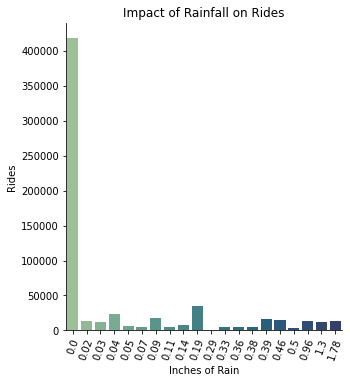

In [ ]:
#Impact of Rainfall on Rides
chart= sns.catplot(x = 'PRCP', kind = 'count', data = new_df, palette="crest")
chart.set_xticklabels(rotation=70)

plt.title("Impact of Rainfall on Rides")
plt.ylabel("Rides")
plt.xlabel("Inches of Rain")

Text(0.5, 6.79999999999999, 'Inches of Rain')

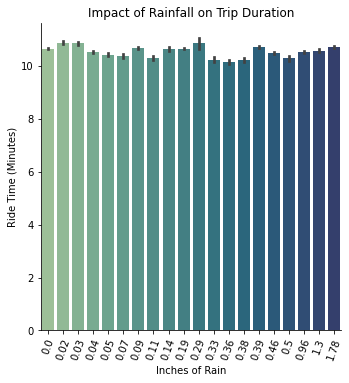

In [ ]:
#Impact of Rainfall on Trip Duration
chart= sns.catplot(x = 'PRCP',y='tripduration_minutes', kind = 'bar', data = new_df, palette="crest")
chart.set_xticklabels(rotation=70)

plt.title("Impact of Rainfall on Trip Duration")
plt.ylabel("Ride Time (Minutes)")
plt.xlabel("Inches of Rain")

Text(0.5, 6.79999999999999, 'Presence of Fog')

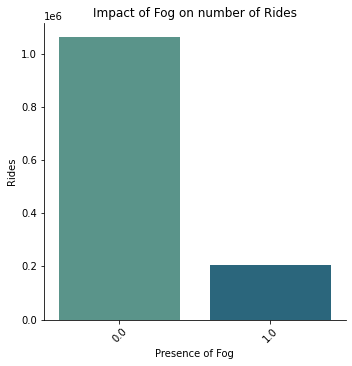

In [ ]:
#Impact of Fog on number of Rides
chart= sns.catplot(x = 'FOG', kind = 'count', data = mdf, palette="crest")
chart.set_xticklabels(rotation=50)

plt.xticks(rotation=45)

plt.title("Impact of Fog on number of Rides")
plt.ylabel("Rides")
plt.xlabel("Presence of Fog")

Text(0.5, 6.79999999999999, 'Inches of Snow')

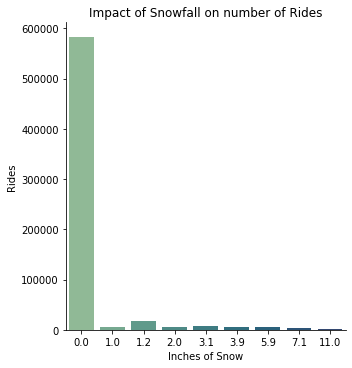

In [ ]:
#Number of rides based on snow depth
sns.catplot(x = 'SNOW DEPTH', kind = 'count', data = new_df, palette="crest")

plt.title("Impact of Snowfall on number of Rides")
plt.ylabel("Rides")
plt.xlabel("Inches of Snow")

Text(0.5, 0, 'Inches of Snow')

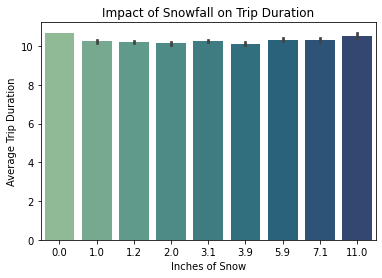

In [ ]:
#Average trip duration based on snow depth
sns.barplot(x ='SNOW DEPTH',y='tripduration_minutes' , data = new_df, palette="crest")

plt.title("Impact of Snowfall on Trip Duration")
plt.ylabel("Average Trip Duration")
plt.xlabel("Inches of Snow")

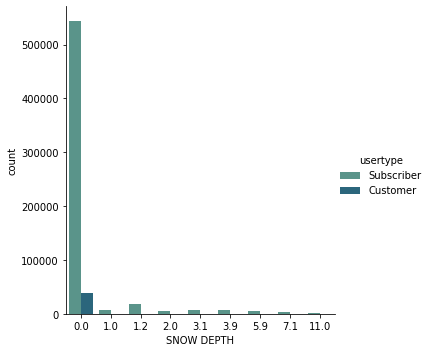

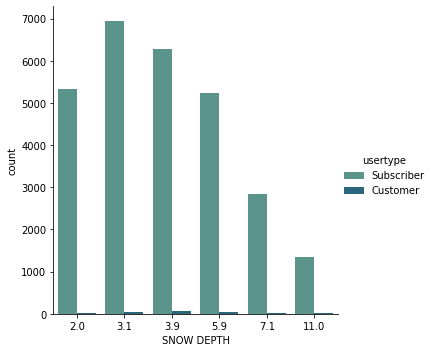

In [ ]:
#Usertype and ride tendency based on snow depth
sns.catplot(x = 'SNOW DEPTH', kind = 'count', data = new_df, hue = 'usertype', palette="crest")

#set condition to see more detail
var = new_df[new_df['SNOW DEPTH'] > 1.2]
sns.catplot(x = 'SNOW DEPTH', kind = 'count', data = var, hue = 'usertype', palette="crest")

Text(0.5, 20.80000000000002, 'Inches of Rain')

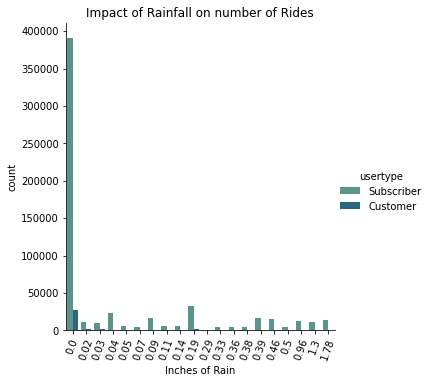

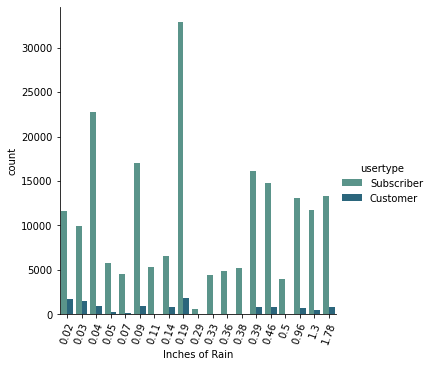

In [ ]:
#Usertype and ride tendency based on rainfall
plot = sns.catplot(x = 'PRCP', kind = 'count', data = new_df, hue = 'usertype', palette="crest")
plot.set_xticklabels(rotation=70)
plt.title("Impact of Rainfall on number of Rides")
plt.xlabel("Inches of Rain")

#set condition to see more detail
var = new_df[new_df['PRCP'] > 0]
plot2 = sns.catplot(x = 'PRCP', kind = 'count', data = var, hue = 'usertype', palette="crest")
plot2.set_xticklabels(rotation=70)
plt.xlabel("Inches of Rain")

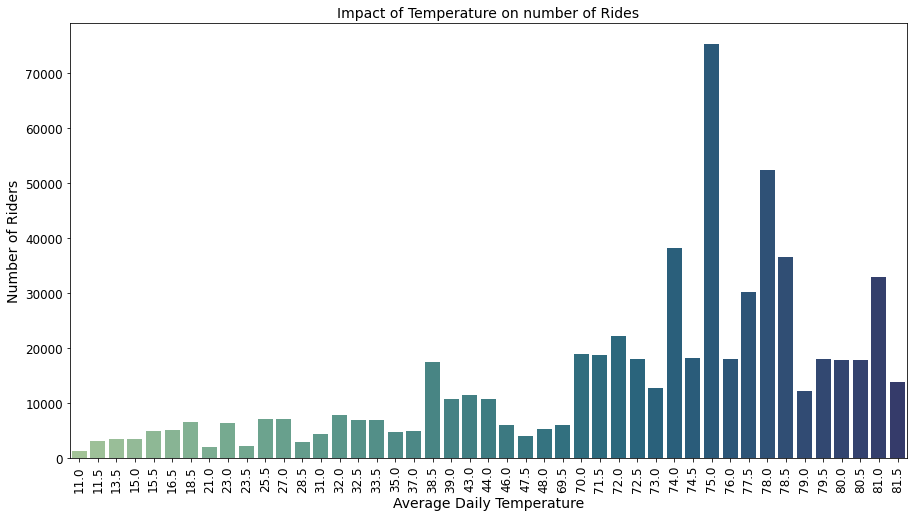

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x="TAVG", data=new_df, palette="crest")
plt.xticks(rotation=90)

plt.title("Impact of Temperature on number of Rides", fontsize=14)
plt.ylabel('Number of Riders', fontsize=14);
plt.xlabel('Average Daily Temperature', fontsize=14);
plt.tick_params(axis='both', which='major', labelsize=12)